In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
c=pd.read_csv("coordinates.csv")
train, val = train_test_split(df,test_size=0.20,random_state=1)


In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,2.507809,0.027905,0.679835,1.423519,20.204035,23.630495,61.927079,12.813918,35.588654,154.472439,190.061093
std,1.114367,0.164711,0.466567,0.636191,7.746786,8.427230,19.248046,8.209502,49.464437,150.266268,180.222029
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,16.500000,116.000000,143.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,48.000000,221.000000,281.000000
max,4.000000,1.000000,1.000000,4.000000,39.360000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
train.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

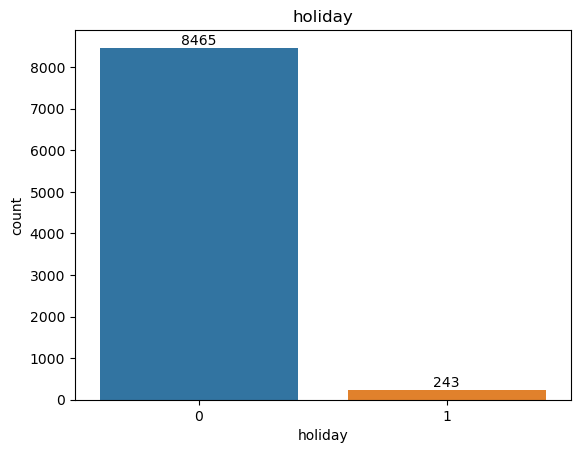

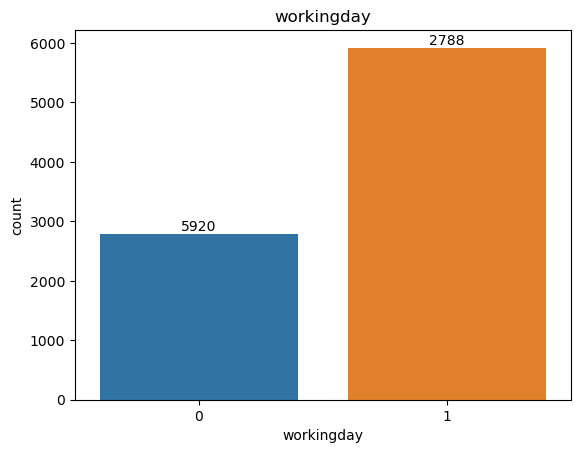

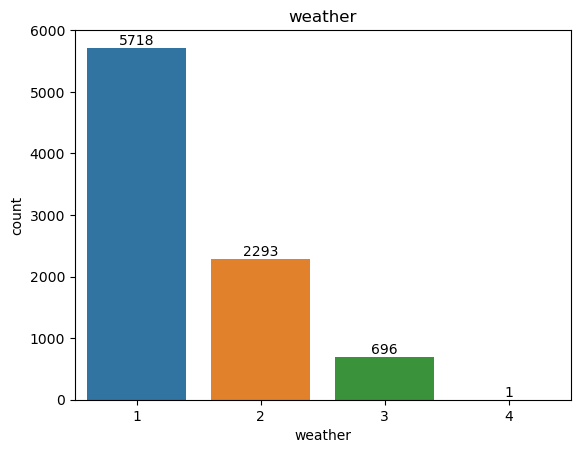

In [8]:
cat_features = train[['holiday', 'workingday', 'weather']]
for i in cat_features:
    ax = sns.countplot(x=cat_features[i] )
    plt.title(i)
    abs_values = cat_features[i].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.show()

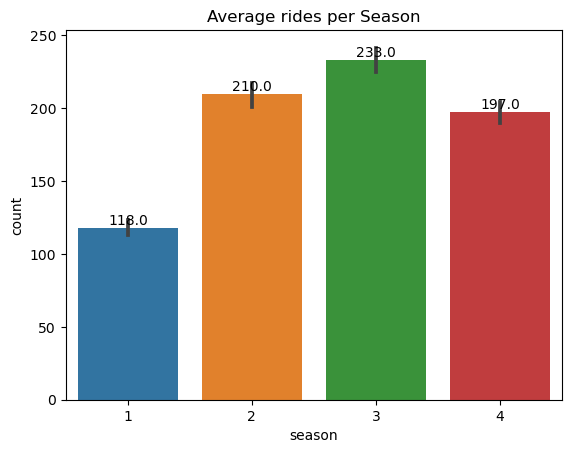

In [10]:
ax = sns.barplot(data=train, x='season', y='count')
plt.title('Average rides per Season')
abs_values = train.groupby('season')['count'].mean().values
ax.bar_label(container=ax.containers[0], labels=np.rint(abs_values))
plt.show()

In [3]:
train['weather'] = np.where(train['weather'] > 3, 3, train['weather'])

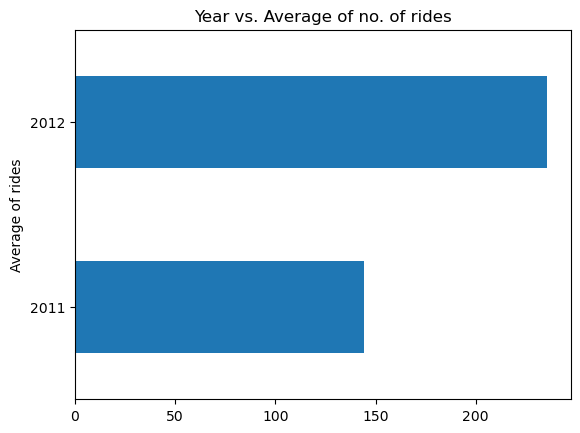

In [13]:
train.groupby(train.datetime.str.extract(r'(\d{4})-(\d{2})-(\d{2})\s(\d{2})')[0])['count'].mean().plot(kind='barh',xlabel='Average of rides', ylabel='Year',                                                                                                       title='Year vs. Average of no. of rides')
plt.show()

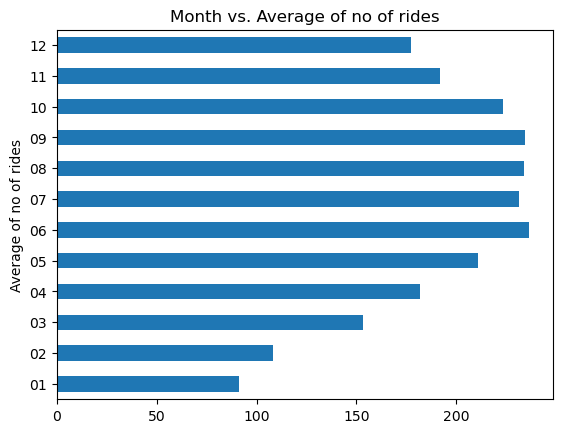

In [14]:
train.groupby(train.datetime.str.extract(r'(\d{4})-(\d{2})-(\d{2})\s(\d{2})')[1])['count'].mean().plot(kind='barh',xlabel='Average of no of rides', ylabel='Month',
                                                                                                        title='Month vs. Average of no of rides')
plt.show()

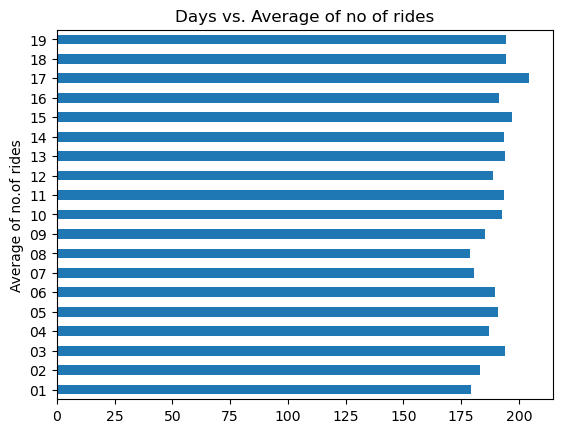

In [15]:
train.groupby(train.datetime.str.extract(r'(\d{4})-(\d{2})-(\d{2})\s(\d{2})')[2])['count'].mean().plot(kind='barh',xlabel='Average of no.of rides',
                                                                                                       ylabel='Days',title='Days vs. Average of no of rides')
plt.show()

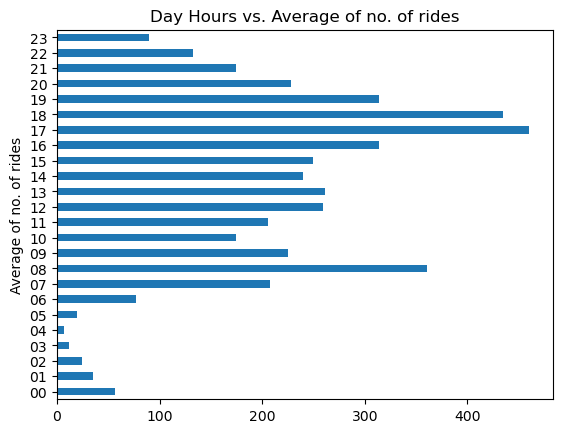

In [16]:
train.groupby(train.datetime.str.extract(r'(\d{4})-(\d{2})-(\d{2})\s(\d{2})')[3])['count'].mean().plot(kind='barh',xlabel='Average of no. of rides', ylabel='Day Hours',
                                                                                                        title='Day Hours vs. Average of no. of rides')
plt.show()

In [17]:
numeric_features = train[['temp','atemp', 'humidity', 'windspeed', 'count']]
numeric_features.describe()

,temp,atemp,humidity,windspeed,count
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,20.204035,23.630495,61.927079,12.813918,190.061093
std,7.746786,8.427230,19.248046,8.209502,180.222029
min,0.820000,0.760000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,47.000000,7.001500,42.000000
50%,20.500000,24.240000,62.000000,12.998000,143.000000
75%,26.240000,31.060000,77.000000,16.997900,281.000000
max,39.360000,45.455000,100.000000,56.996900,977.000000


In [18]:
def boxplot_hist(df, column):
    plt.subplot(1, 2, 1) 
    plt.boxplot(df[column])
    plt.title(column +' '+ "Boxplot")
    plt.ylabel(column)

    plt.subplot(1, 2, 2) 
    plt.hist(df[column])
    plt.title(column +' '+ "Histogram")
    plt.xlabel(column)
    plt.ylabel('Frequency ')
    plt.tight_layout()
    plt.show()

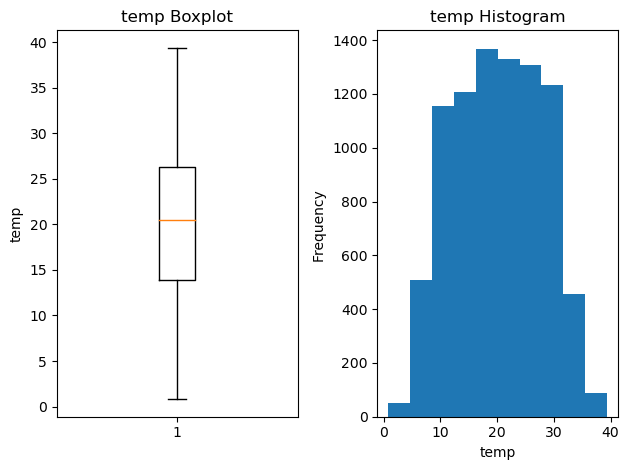

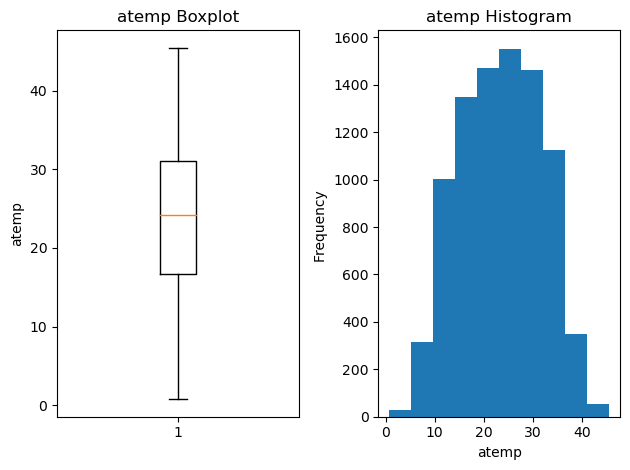

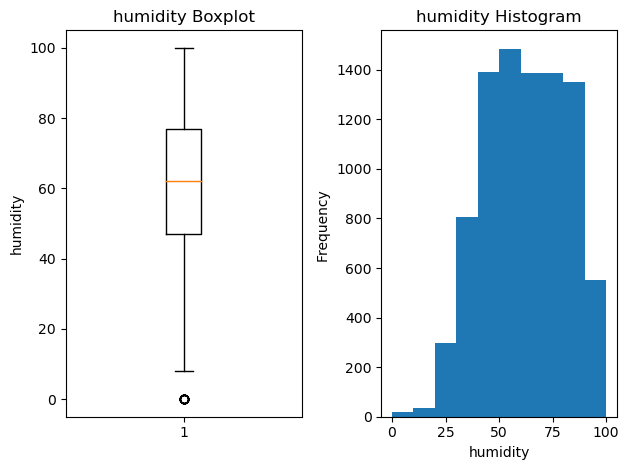

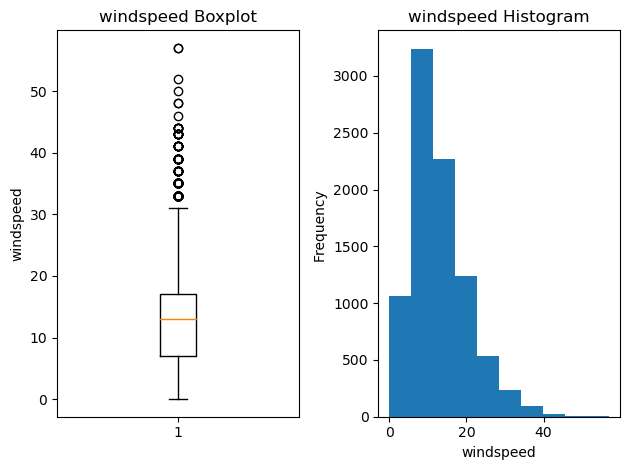

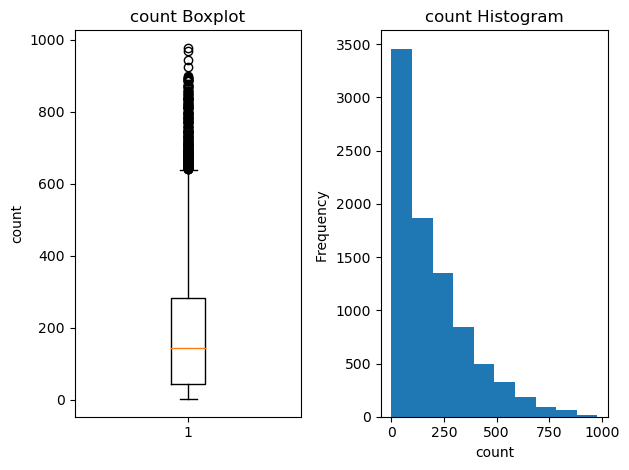

In [19]:
for i in numeric_features:
    boxplot_hist(train, i)

In [20]:
train[train['windspeed']>55]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2756,2011-07-03 18:00:00,3,0,0,3,32.8,37.12,49,56.9969,74,107,181
2755,2011-07-03 17:00:00,3,0,0,3,32.8,37.12,49,56.9969,181,177,358


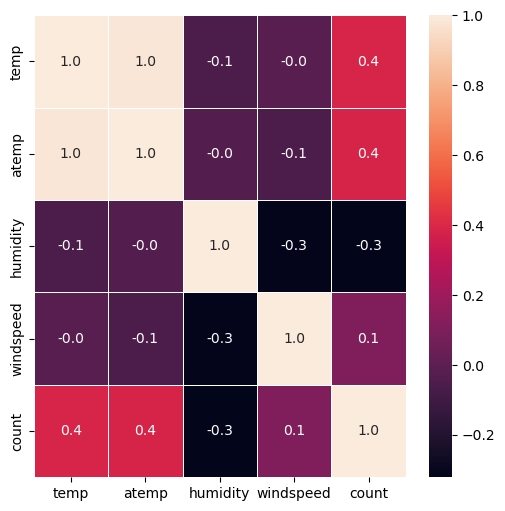

In [21]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(numeric_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [22]:
train[['year', 'month', 'day', 'hour']] = train.datetime.str.extract(r'(\d{4})-(\d{2})-(\d{2})\s(\d{2})').applymap(int)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 3224 to 235
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8708 non-null   object 
 1   season      8708 non-null   int64  
 2   holiday     8708 non-null   int64  
 3   workingday  8708 non-null   int64  
 4   weather     8708 non-null   int64  
 5   temp        8708 non-null   float64
 6   atemp       8708 non-null   float64
 7   humidity    8708 non-null   int64  
 8   windspeed   8708 non-null   float64
 9   casual      8708 non-null   int64  
 10  registered  8708 non-null   int64  
 11  count       8708 non-null   int64  
 12  year        8708 non-null   int64  
 13  month       8708 non-null   int64  
 14  day         8708 non-null   int64  
 15  hour        8708 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 1.1+ MB


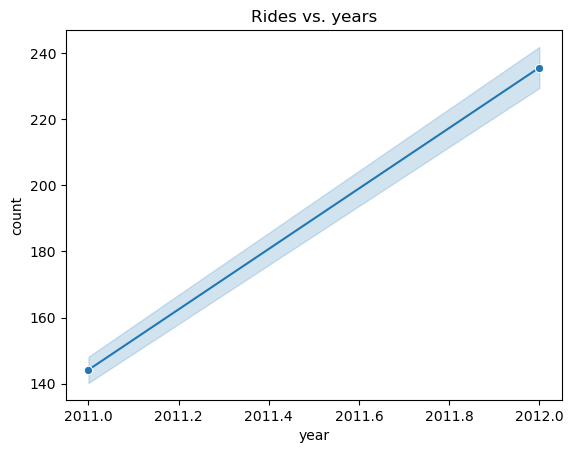

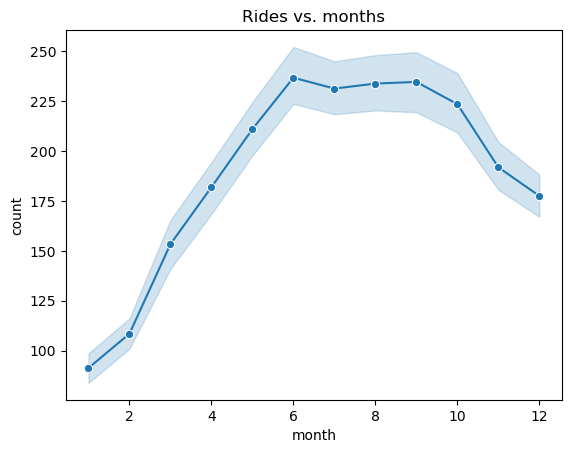

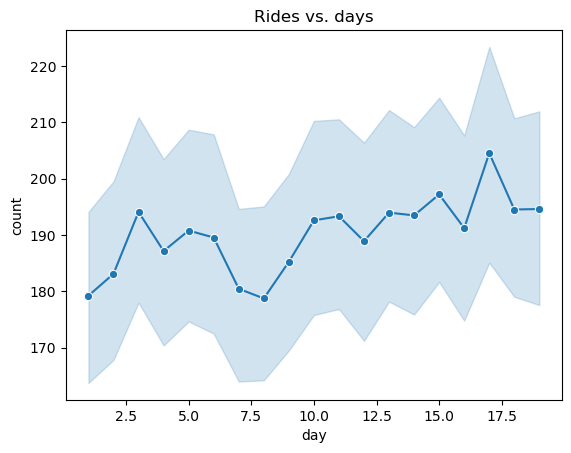

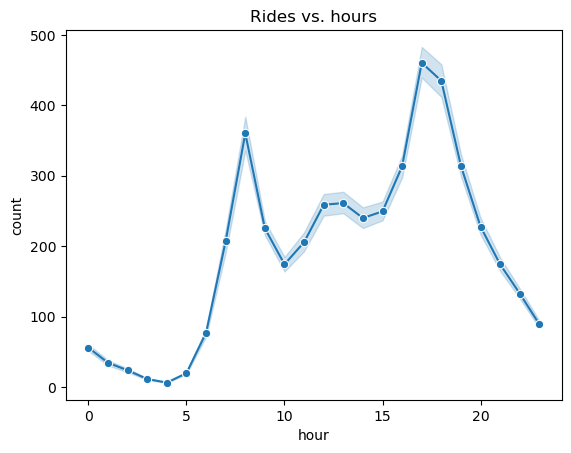

In [24]:
time_features = train[['year', 'month', 'day', 'hour']]
for i in time_features:  
    sns.lineplot(data = train, x=i, y='count', marker='o')
    plt.title('Rides vs. ' + i +'s')
    plt.show()

In [6]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")
train, val = train_test_split(train, test_size=0.15, random_state=1)

In [7]:
def one_hot_encoding(df, column):
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)], axis=1)
    df = df.drop([column], axis=1)
    return df

from sklearn.preprocessing import StandardScaler, MinMaxScaler
def preprocessing(df, test_set=False):
    # set weather more than 4 to 3
    df['weather'] = np.where(df['weather'] > 3, 3, df['weather'])
    
    # Scaling columns
    scaler = MinMaxScaler()
    df[['temp', 'atemp', 'humidity', 'windspeed', 'holiday', 'workingday']] = scaler.fit_transform(df[['temp', 'atemp', 'humidity', 'windspeed','holiday', 'workingday']])
    
    # Extracting year, month, day, hour 
    df[['year', 'month', 'day', 'hour']] = df.datetime.str.extract(r'(\d{4})-(\d{2})-(\d{2})\s(\d{2})')
    df.drop(columns=['day'], axis=1, inplace=True)
    # we can drop the day column since it doesn't affect the count of bike rented .astype('category')
    
    categorical_features = ['year', 'month', 'hour', 'season', 'weather']
    
    for i in categorical_features:
        df = one_hot_encoding(df, i)
        
    
    if test_set == True:
        test_ids = df['datetime']
        df = df.drop(columns=['datetime'], axis=1)
        return df, test_ids
    else:
        #df[['count','casual']] = scaler.fit_transform(df[['count','casual']])
        df = df.drop(columns=['casual', 'registered', 'datetime'], axis=1)
    
    return df

In [8]:
train = preprocessing(train)
val = preprocessing(val)
test, test_ids = preprocessing(test, test_set=True)
df = preprocessing(df)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

# Splitting the data 
X_train = train.drop(columns='count', axis=1)
y_train = train['count']
# since we used scaling we have to transform the output too by using log transformation
scaler = MinMaxScaler()
y_log_train = np.log(y_train)
#y_log_train = scaler.fit_transform(y_train)

X_val = val.drop(columns='count', axis=1)
y_val = val['count']
y_log_val = np.log(y_val)
#y_log_val = scaler.fit_transform(y_val)

# train the model
model = LinearRegression()
model.fit(X_train, y_log_train)
y_val_pred = model.predict(X_val)
# y_val_pred = y_val_pred.reshape(-1,1)
#y_val_pred = scaler.inverse_transform(y_val_pred)
y_val_pred = np.exp(y_val_pred)
# calculate RMSLE on validation data
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
print("RMSLE on validation data: {:.3f}".format(rmsle))

# predict on test data
y_test_pred = model.predict(test)
y_test_pred = np.exp(y_test_pred)
# create a submission file
submission_df = pd.DataFrame({'datetime': test_ids, 'count': y_test_pred})
submission_df.to_csv('submission2.csv', index=False)

RMSLE on validation data: 0.578


C:\Users\Swasti\AppData\Local\Temp\ipykernel_15652\3397666532.py:31: RuntimeWarning: overflow encountered in exp
  y_test_pred = np.exp(y_test_pred)


In [10]:
all_data=pd.read_csv('submission2.csv')

In [12]:
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,14.958570
1,2011-01-20 01:00:00,8.804990
2,2011-01-20 02:00:00,4.983181
3,2011-01-20 03:00:00,2.910035
4,2011-01-20 04:00:00,1.985473
